## Import Library

In [2]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import string
import spacy
import re

### Text Analysis (1 url)

#### Scrap Data

In [3]:
url="""https://insights.blackcoffer.com/how-is-login-logout-time-tracking-for-employees-in-office-done-by-ai/"""

In [4]:
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"}
page = requests.get(url, headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')

We need to pass argument called Headers by passing "User-Agent" to the request to bypass the mod-security error.

In [5]:
soup=BeautifulSoup(page.content, 'html.parser')

#### Extract Title from articel

In [6]:
title=soup.find('h1',class_="entry-title")
title=title.text.replace('\n'," ")
title

'How is Login Logout Time Tracking for Employees in Office done by AI?'

#### Extract Content from articel

In [7]:
content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content

' When people hear AI they often think about sentient robots and magic boxes. AI today is much more mundane and simple—but that doesn’t mean it’s not powerful. Another misconception is that high-profile research projects can be applied directly to any business situation. AI done right can create an extreme return on investments (ROIs)—for instance through automation or precise prediction. But it does take thought, time, and proper implementation. We have seen that success and value generated by AI projects are increased when there is a grounded understanding and expectation of what the technology can deliver from the C-suite down. “Artificial Intelligence (AI) is a science and a set of computational technologies that are inspired by—but typically operate quite differently from—the ways people use their nervous systems and bodies to sense, learn, reason and take action.”3 Lately there has been a big rise in the day-to-day use of machines powered by AI. These machines are wired using cro

#### Remove punctuation from the content

In [8]:
#Punctuation
content = content.translate(str.maketrans('', '', string.punctuation)) 
content

' When people hear AI they often think about sentient robots and magic boxes AI today is much more mundane and simple—but that doesn’t mean it’s not powerful Another misconception is that highprofile research projects can be applied directly to any business situation AI done right can create an extreme return on investments ROIs—for instance through automation or precise prediction But it does take thought time and proper implementation We have seen that success and value generated by AI projects are increased when there is a grounded understanding and expectation of what the technology can deliver from the Csuite down “Artificial Intelligence AI is a science and a set of computational technologies that are inspired by—but typically operate quite differently from—the ways people use their nervous systems and bodies to sense learn reason and take action”3 Lately there has been a big rise in the daytoday use of machines powered by AI These machines are wired using crossdisciplinary appro

#### convert into Tokens 

In [9]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)
print(text_tokens[0:50])

['When', 'people', 'hear', 'AI', 'they', 'often', 'think', 'about', 'sentient', 'robots', 'and', 'magic', 'boxes', 'AI', 'today', 'is', 'much', 'more', 'mundane', 'and', 'simple—but', 'that', 'doesn', '’', 't', 'mean', 'it', '’', 's', 'not', 'powerful', 'Another', 'misconception', 'is', 'that', 'highprofile', 'research', 'projects', 'can', 'be', 'applied', 'directly', 'to', 'any', 'business', 'situation', 'AI', 'done', 'right', 'can']


####  lenghts of tokens before removing stopwords

In [10]:
len(text_tokens)

728

#### Remove stopwords from the tokens

In [11]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pushkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pushkar\AppData\Roaming\nltk_data...


['When', 'people', 'hear', 'AI', 'often', 'think', 'sentient', 'robots', 'magic', 'boxes', 'AI', 'today', 'much', 'mundane', 'simple—but', '’', 'mean', '’', 'powerful', 'Another', 'misconception', 'highprofile', 'research', 'projects', 'applied', 'directly', 'business', 'situation', 'AI', 'done', 'right', 'create', 'extreme', 'return', 'investments', 'ROIs—for', 'instance', 'automation', 'precise', 'prediction']


[nltk_data]   Package stopwords is already up-to-date!


####  lenghts of tokens after removing stopwords

In [12]:
len(no_stop_tokens)

456

#### Check for positive words

In [13]:
with open("G:/Data science/assignment/text minning(done)/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[5:]

Download the positive words dictionary and store in local system to speed up the process

In [14]:
pos_count = " ".join ([w for w in no_stop_tokens if w in poswords])
pos_count=pos_count.split(" ")

#### Positive Score

In [15]:
Positive_score=len(pos_count)
print(Positive_score)

16


#### Check for negative words

In [16]:
with open("G:/Data science/assignment/text minning(done)/negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    
negwords = negwords[36:]

In [17]:
neg_count = " ".join ([w for w in no_stop_tokens if w in negwords])
neg_count=neg_count.split(" ")

#### Negative score

In [18]:
Negative_score=len(neg_count)
print(Negative_score)

9


In [19]:
filter_content = ' '.join(no_stop_tokens)

In [20]:
data=[[url,title,content,filter_content,Positive_score,Negative_score]]

In [21]:
data=pd.DataFrame(data,columns=["url","title","content","filter_content","Positive_Score","Negative_Score"])

#### calculate Polarity Score & Subjectivity Score

In [22]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

# Adding Subjectivity & Polarity
data[["polarity", "subjectivity"]] = data.apply(sentiment_analysis, axis=1)

data

,url,title,content,filter_content,Positive_Score,Negative_Score,polarity,subjectivity
0,https://insights.blackcoffer.com/how-is-login-...,How is Login Logout Time Tracking for Employee...,When people hear AI they often think about se...,When people hear AI often think sentient robot...,16,9,0.14304,0.478514


#### Average sentence length

In [23]:
#AVG SENTENCE LENGTH
AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))
print('Word average =', AVG_SENTENCE_LENGTH)

Word average = 3673.0


In [24]:
import textstat

Textstat is an easy to use library to calculate statistics from text. It helps determine readability, complexity, and grade level.

#### FOG INDEX

In [25]:
FOG_INDEX=(textstat.gunning_fog(content))
print(FOG_INDEX)

289.41


#### AVG NUMBER OF WORDS PER SENTENCE

In [26]:
AVG_NUMBER_OF_WORDS_PER_SENTENCE = [len(l.split()) for l in re.split(r'[?!.]', content) if l.strip()]
AVG_NUMBER_OF_WORDS_PER_SENTENCE=print(sum(AVG_NUMBER_OF_WORDS_PER_SENTENCE)/len(AVG_NUMBER_OF_WORDS_PER_SENTENCE))

712.0


#### COMPLEX WORD COUNT

In [27]:
def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)
print(COMPLEX_WORDS)

1279


#### Word Count

In [28]:
Word_Count=len(content)
print(Word_Count)

4386


#### Percentage of Complex words 

In [29]:
pcw=(COMPLEX_WORDS/Word_Count)*100
print(pcw)

29.1609667122663


#### Personal Pronouns

In [30]:
def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'PRP': # If the word is a proper noun
                count = count + 1 
        
    return(count)         
                


# Calling the ProperNounExtractor function to extract all the proper nouns from the given text. 
Personal_Pronouns=ProperNounExtractor(content)  


#### Average Word Length

In [31]:
Average_Word_Length=len(content.replace(' ',''))/len(content.split())
print(Average_Word_Length)

5.158707865168539


#### SYLLABLE PER WORD

In [32]:
word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1
print("The AVG number of syllables in the word is: ")
print(syllable_count/len(content.split()))

The AVG number of syllables in the word is: 
2.109550561797753


#### For WordCloud

In [33]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

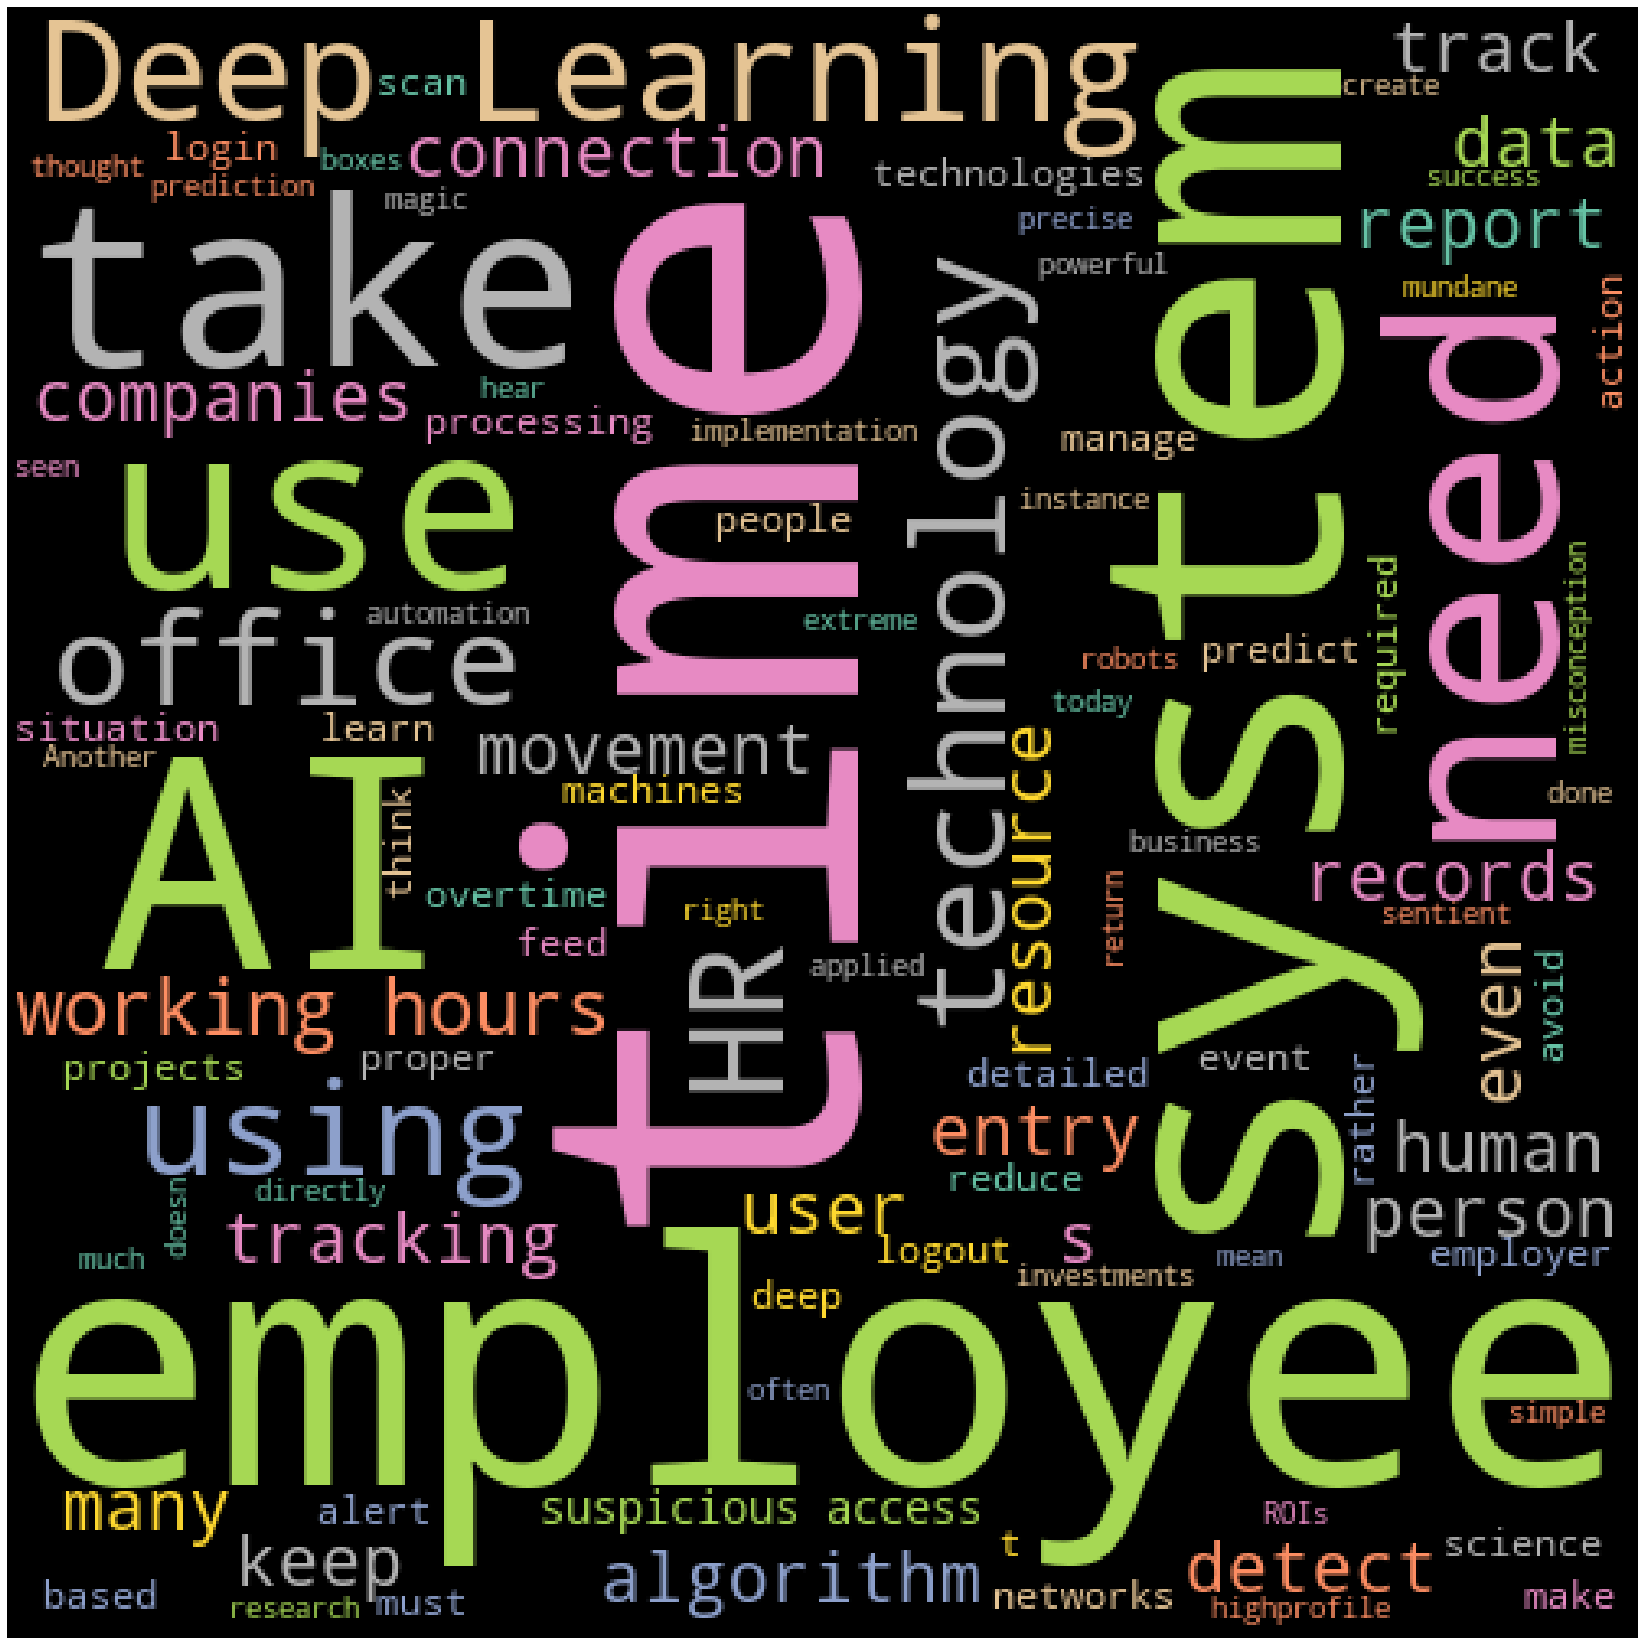

In [34]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 500, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(content)
# Plot
plot_cloud(wordcloud)

#### positive word cloud

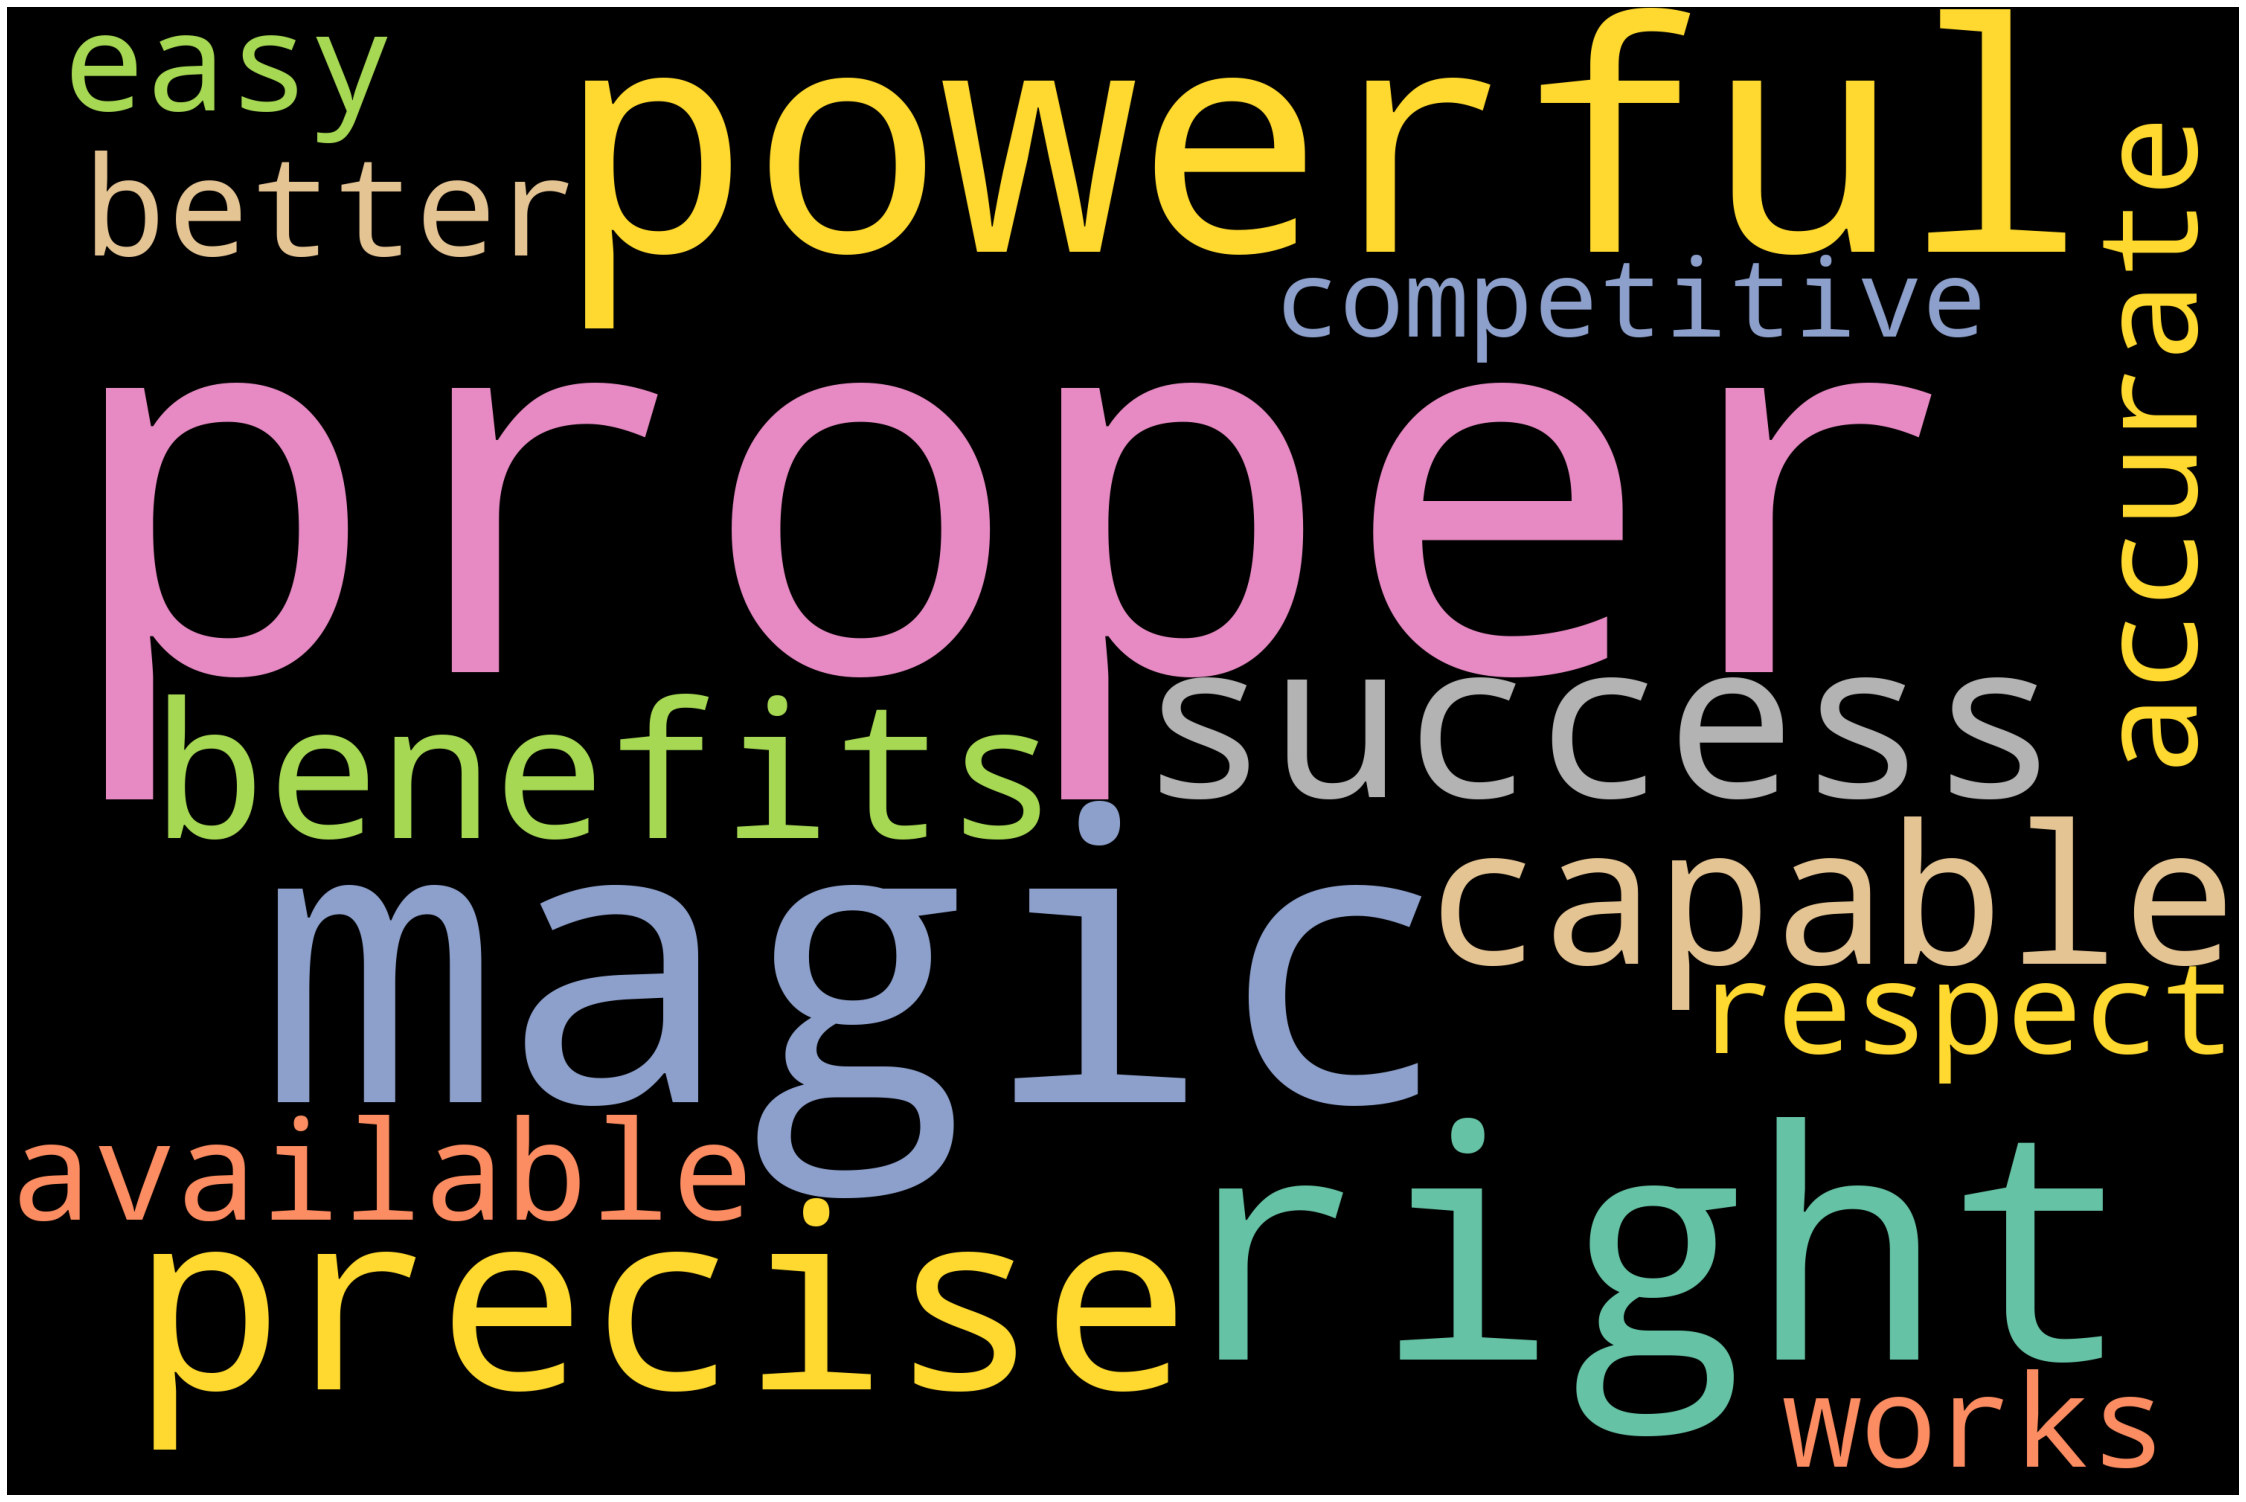

In [35]:
# Choosing the only words which are present in posword
pos_review = " ".join ([w for w in pos_count if w in poswords])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(pos_review)
#Plot
plot_cloud(wordcloud)

#### negative word cloud

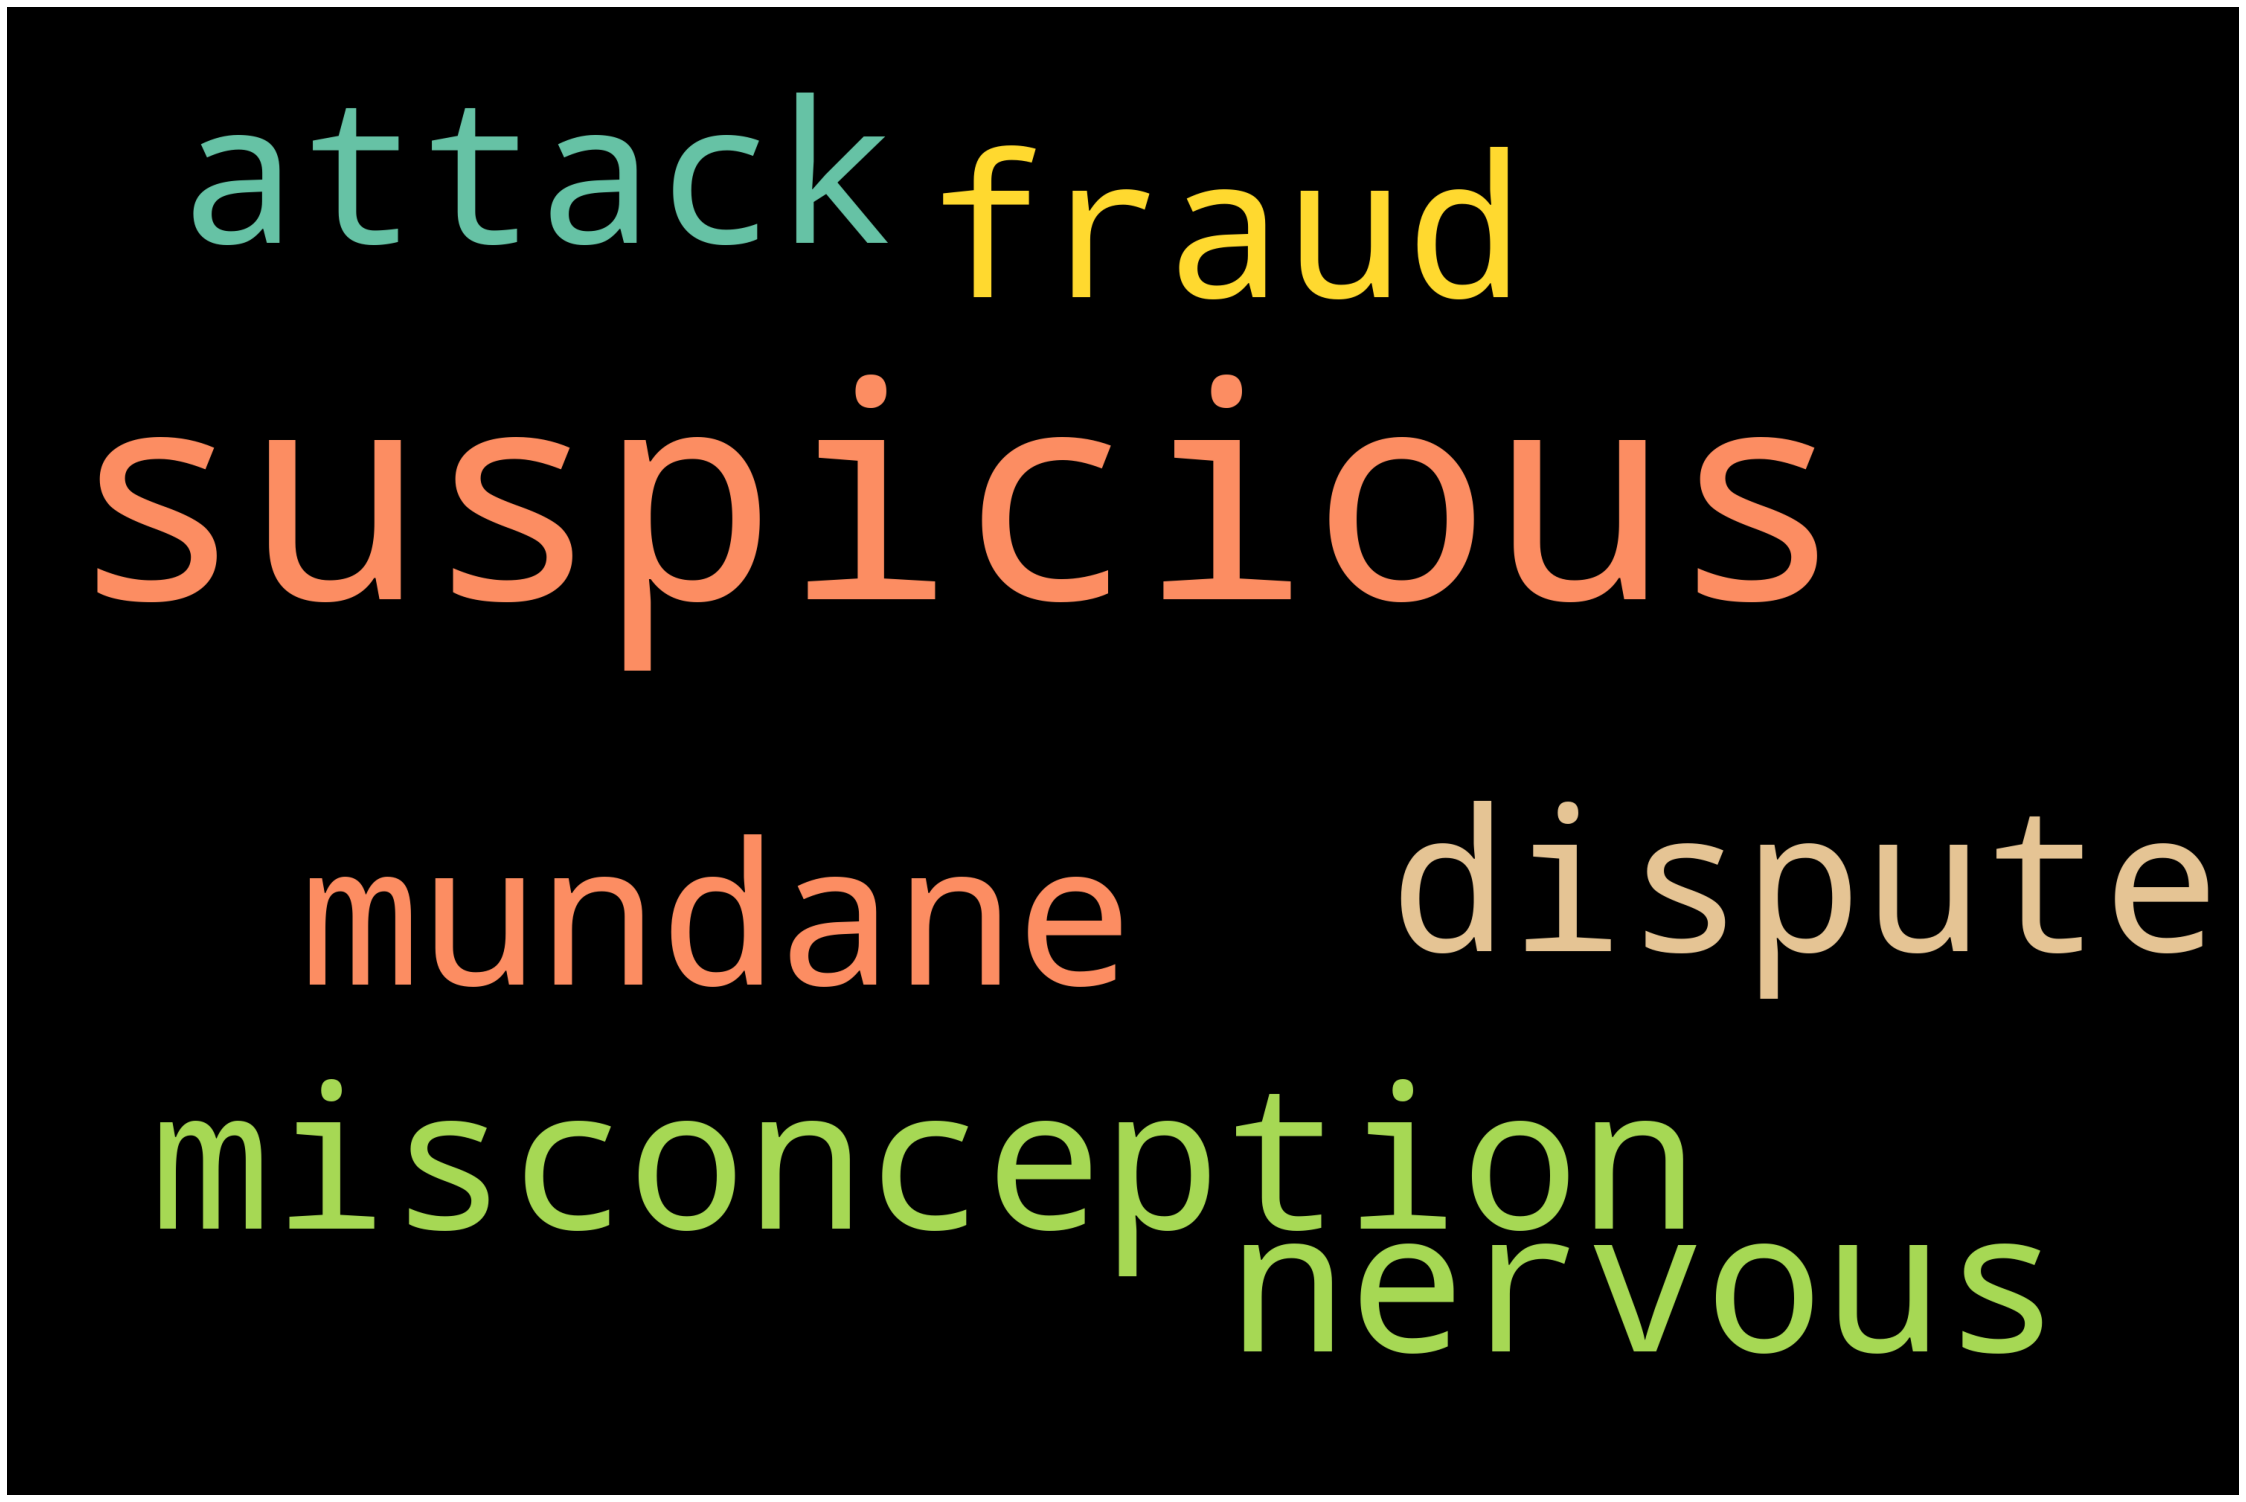

In [36]:
# Choosing the only words which are present in negwords
neg_review = " ".join ([w for w in neg_count if w in negwords])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(neg_review)
#Plot
plot_cloud(wordcloud)
